# MSc Project : analysis 02 complete data

### Setting up the environment

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4
import pandas as pd
# from datetime import datetime
# from datetime import timedelta
# from scipy import stats
# import scipy.interpolate as interp
from dask.distributed import Client
%matplotlib inline

In [3]:
from functions import ccplot, binning

In [4]:
import seaborn as sns
# Use seaborn style defaults and set default figure size
plt.style.use('seaborn-pastel')
sns.set_theme(style="ticks")

In [5]:
# Colormap selection
xr.set_options(cmap_divergent='RdBu_r', cmap_sequential='YlGnBu')

In [6]:
# client = Client(n_workers=4, threads_per_worker=1, memory_limit='64GB')

### Impoting and preparing data

In [7]:
mfdata_DIR = './data/GPM_lowres_data/*.nc'

gpm = xr.open_mfdataset(mfdata_DIR, chunks={'time':2000}, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# gpm = xr.open_mfdataset(mfdata_DIR, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# gpm = xr.open_dataset('./data/GPM_data/gpm_2000.nc', chunks={"time":2000})

In [8]:
gpm = gpm.unify_chunks()
gpm.chunks

Frozen({'time': (2000, 2000, 2000, 2000, 2000, 272, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1568, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1568, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1568, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1568, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 

In [9]:
# precip = regridder(gpm.precipitationCal)

In [10]:
# gpm = gpm.persist()

In [11]:
gpm

<xarray.Dataset>
Dimensions:    (time: 369600, lon: 161, lat: 161)
Coordinates:
  * time       (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:30:00
  * lon        (lon) float64 60.0 60.25 60.5 60.75 ... 99.25 99.5 99.75 100.0
  * lat        (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 39.25 39.5 39.75 40.0
Data variables:
    precipCal  (time, lat, lon) float32 dask.array<chunksize=(2000, 161, 161), meta=np.ndarray>

In [23]:
precip = gpm.precipCal.resample(time = '1H').mean()

In [24]:
precip

<xarray.DataArray 'precipCal' (time: 184800, lat: 161, lon: 161)>
dask.array<stack, shape=(184800, 161, 161), dtype=float32, chunksize=(1, 161, 161), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:00:00
  * lon      (lon) float64 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 39.0 39.25 39.5 39.75 40.0

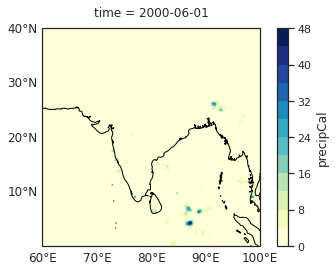

In [26]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([59.9, 100.1, 0, 40.1], crs=ccrs.PlateCarree())
precip.isel(time=0).plot.contourf(ax = ax, extend='neither', levels=15)
ax.coastlines()
gridliner = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.1, linestyle='--')
gridliner.top_labels = False
gridliner.right_labels = False
gridliner.ylines = False  # you need False
gridliner.xlines = False  # you need False

In [16]:
mfdata_DIR2 = './data/era_data/*.nc'

era = xr.open_mfdataset(mfdata_DIR2, chunks={'time':2000}, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# era = xr.open_mfdataset(mfdata_DIR2, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)

In [17]:
era = era.unify_chunks()
era.chunks

Frozen({'time': (2000, 2000, 2000, 2000, 784, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 784, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 784, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 784, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 784, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 784, 2000, 2000, 2000, 775), 'latitude': (161,), 'longitude': (161,), 'expver': (2,)})

In [18]:
era = era.sel(expver=1, drop=True)

In [19]:
era = era.transpose('time', 'latitude', 'longitude')

In [21]:
era = era.sel(time = slice("2000-06-01 00:00:00","2021-06-30 23:00:00"))

In [22]:
era

<xarray.Dataset>
Dimensions:    (longitude: 161, latitude: 161, time: 184800)
Coordinates:
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 99.5 99.75 100.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... 0.75 0.5 0.25 0.0
  * time       (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    d2m        (time, latitude, longitude) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    mx2t       (time, latitude, longitude) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    mn2t       (time, latitude, longitude) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    sst        (time, latitude, longitude) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2021-10-02 12:58:09 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [27]:
t2m = era.t2m
d2m = era.d2m

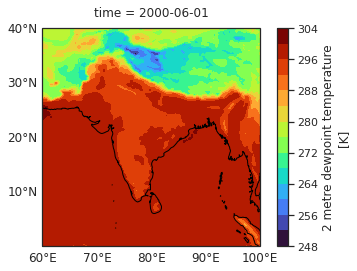

In [29]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([59.9, 100.1, 0, 40.1], crs=ccrs.PlateCarree())
d2m.isel(time=0).plot.contourf(ax = ax, cmap='turbo', extend='neither', levels=15)
ax.coastlines()
gridliner = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.1, linestyle='--')
gridliner.top_labels = False
gridliner.right_labels = False
gridliner.ylines = False  # you need False
gridliner.xlines = False  # you need False